In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
data = pd.read_csv(r'C:\Users\HP\Pandas_codegym\Phân tích bộ dữ liệu Online_retailer\OnlineRetail.csv', encoding = 'unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### Chọn mục tiêu Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011. Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
#Kiểm tra dữ liệu khuyết thiếu
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
#Customer ID và Description bị khuyết thiếu

In [20]:
#Kiểm tra dữ liệu trùng lặp
data.drop_duplicates(subset = 'InvoiceNo', keep ='first', inplace=True)
data.shape[0]
data.reset_index(inplace=True)
data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
2,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
3,21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom
4,25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
25895,541865,581583,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,13777.0,United Kingdom
25896,541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,12/9/2011 12:25,0.72,13777.0,United Kingdom
25897,541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,15804.0,United Kingdom
25898,541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom


<AxesSubplot:>

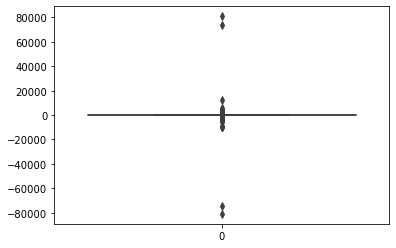

In [21]:
sns.boxplot(data=data['Quantity'])

<AxesSubplot:>

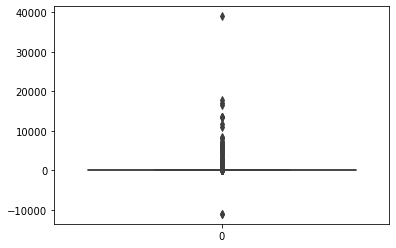

In [22]:
sns.boxplot(data=data['UnitPrice'])

In [23]:
#Xử lý dữ liệu ngoại lai với quantity
data = data[data['Quantity']>=0]
data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
2,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
3,21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom
4,25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
25895,541865,581583,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,13777.0,United Kingdom
25896,541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,12/9/2011 12:25,0.72,13777.0,United Kingdom
25897,541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,15804.0,United Kingdom
25898,541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom


In [24]:
data = data[data['UnitPrice']>=0]
data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
2,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
3,21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom
4,25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
25895,541865,581583,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,13777.0,United Kingdom
25896,541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,12/9/2011 12:25,0.72,13777.0,United Kingdom
25897,541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,15804.0,United Kingdom
25898,541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom


C:\Users\HP\AppData\Local\Temp\ipykernel_2956\2314099225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['InvoiceDate'].str.split(' ').str[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_2956\2314099225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Date']).dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_2956\2314099225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

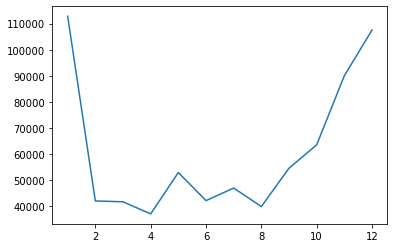

In [25]:
data['Date'] = data['InvoiceDate'].str.split(' ').str[0]
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.year
#Số lượng hàng trong năm 2021
d1 = data[data['Year']==2011].groupby('Month')['Quantity'].sum()
plt.plot(d1.index, d1.values)
plt.show()

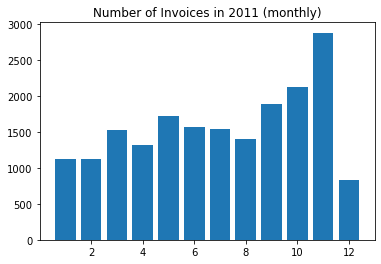

In [26]:
#tỔNG SỐ lượng đơn hàng đã đặt trong năm 2011
d2 = data[data['Year']==2011].groupby('Month')['InvoiceNo'].count()
plt.bar(d2.index,d2.values)
plt.title('Number of Invoices in 2011 (monthly)')
plt.show()

It is clear that the number of invoices fluctuate from month to month in 2011 and reach a peak in november.

#### Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.<br>Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.


C:\Users\HP\AppData\Local\Temp\ipykernel_2956\3220642857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Quantity']*data['UnitPrice']


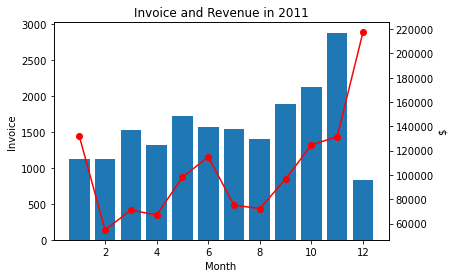

In [27]:
data['Revenue'] = data['Quantity']*data['UnitPrice']

data3 = data[data['Year']==2011].groupby('Month')['Revenue'].sum()
data4 = data[data['Year']==2011].groupby('Month')['InvoiceNo'].count()
plt.bar(data4.index, data4)
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(data3.index, data3, label = 'Revenue', c='r', marker='o')
axes1.set_xlabel('Month')
axes1.set_ylabel('Invoice')
axes2.set_ylabel('$')
plt.title('Invoice and Revenue in 2011')
plt.show()

In [28]:
data3

Month
1     132128.41
2      54739.41
3      71069.07
4      67027.72
5      98074.11
6     114964.81
7      75205.00
8      72289.22
9      96600.26
10    124727.28
11    131529.12
12    217494.21
Name: Revenue, dtype: float64

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
df = pd.read_csv(r'C:\Users\HP\Pandas_codegym\Phân tích bộ dữ liệu Online_retailer\OnlineRetail.csv', encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #chuyển InvoiceDate thành datetime object
d1 = df[['InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']] #lấy các cột dữ liệu cần thiết
d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
d1 = d1.set_index(['InvoiceDate']) #chuyển mỗi giá trị InvoiceDate thành index của mỗi để search theo index
d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.month).sum() #tính tổng doanh thu theo tháng

d4 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first') # xóa bỏ các dòng trùng lặp của cùng một đơn hàng
d4 = d4['2011']
d4 = d4.reset_index()
d5 = d4.groupby(by=d4['InvoiceDate'].dt.month).count() #đếm tổng số đơn hàng trong tháng


C:\Users\HP\AppData\Local\Temp\ipykernel_2956\919673577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
C:\Users\HP\AppData\Local\Temp\ipykernel_2956\919673577.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
C:\Users\HP\AppData\Local\Temp\ipykernel_2956\919673577.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future ver

In [31]:
d3

,Quantity,UnitPrice,Revenue
InvoiceDate,,,
1,308966,172752.800,560000.260
2,277989,127448.770,498062.650
3,351872,171486.510,683267.080
4,289098,129164.961,493207.121
5,380391,190685.460,723333.510
6,341623,200717.340,691123.120
7,391116,171906.791,681300.111
8,406199,150385.680,682680.510
9,549817,199235.212,1019687.622


In [32]:
d5

,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Revenue
InvoiceDate,,,,,
1,1476,1476,1476,1476,1476
2,1393,1393,1393,1393,1393
3,1983,1983,1983,1983,1983
4,1744,1744,1744,1744,1744
5,2162,2162,2162,2162,2162
6,2012,2012,2012,2012,2012
7,1927,1927,1927,1927,1927
8,1737,1737,1737,1737,1737
9,2327,2327,2327,2327,2327


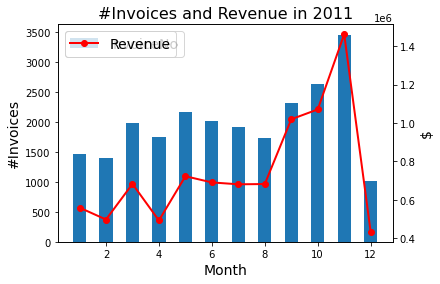

In [33]:
x = d5.index.get_level_values(0)
plt.bar(x, d5['InvoiceNo'], width = 0.5, label = 'InvoiceNo')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, d3['Revenue'], label = 'Revenue', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Month', fontsize = 14)
axes1.set_ylabel('#Invoices', fontsize = 14)
axes2.set_ylabel('$', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title('#Invoices and Revenue in 2011', fontsize = 16)
plt.show()